In [130]:
import k3d
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style(style="darkgrid")

## Observables

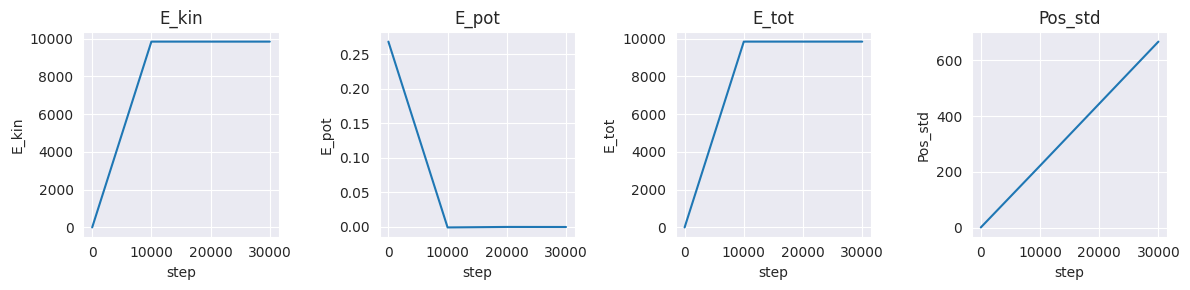

In [131]:
observables = pd.read_csv('observables.txt', sep='\t')

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True)

for ax, col in zip(axes, observables.columns[1:], strict=True):
    sns.lineplot(data=observables, x='step', y=col, ax=ax)
    ax.set_title(col)

for ax in axes:
    ax.ticklabel_format(useOffset=False)
plt.tight_layout()
plt.show()

# Trajectory

In [132]:
trajectory = pd.read_csv('trajectory.txt', sep='\t')

positions_by_step = [group[['x','y','z']].values for _, group in trajectory.groupby('step')]

trajplot = k3d.plot()
points = k3d.points(positions_by_step[0], point_size=.1, color=0xff0000)
trajplot += points
trajplot.display()

points.positions = {i: pos for i, pos in enumerate(positions_by_step)}

/home/giulio/projects/frog/.venv/lib/python3.12/site-packages/traittypes/traittypes.py:98: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

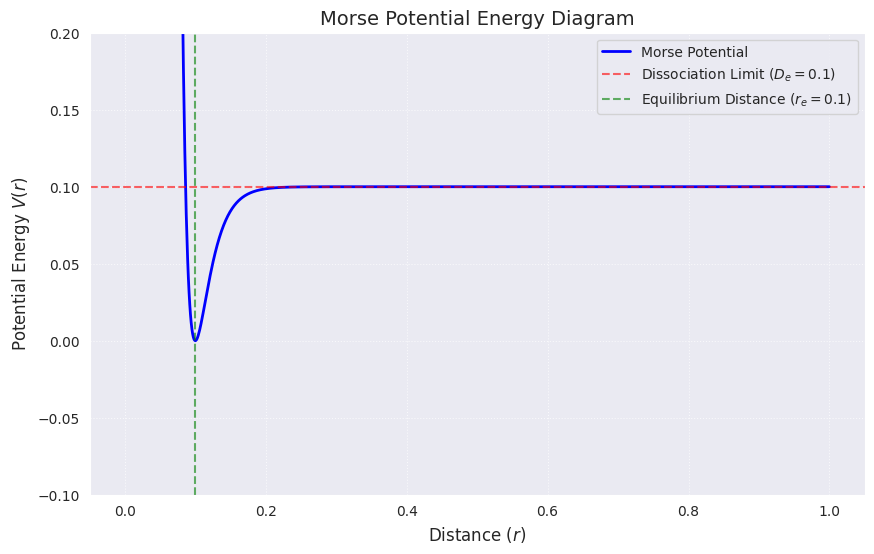

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
MORSE_D = 0.1   # Potential depth (De)
MORSE_A = 50   # Width parameter (a)
MORSE_R0 = 0.1  # Equilibrium distance (re)

def morse_potential(r, de, a, re):
    """Calculates the Morse potential V(r)."""
    return de * (1 - np.exp(-a * (r - re)))**2

# Generate a range of distances (r)
# We start slightly above 0 and extend to 60 to visualize the curve 
# given the wide width parameter (a=0.1)
r = np.linspace(0, 1, 1000)
v = morse_potential(r, MORSE_D, MORSE_A, MORSE_R0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r, v, color='blue', linewidth=2, label='Morse Potential')

# Add reference lines for De and re
plt.axhline(y=MORSE_D, color='red', linestyle='--', alpha=0.6, label=f'Dissociation Limit ($D_e={MORSE_D}$)')
plt.axvline(x=MORSE_R0, color='green', linestyle='--', alpha=0.6, label=f'Equilibrium Distance ($r_e={MORSE_R0}$)')

plt.ylim(-MORSE_D, MORSE_D * 2)

# Formatting the chart
plt.title('Morse Potential Energy Diagram', fontsize=14)
plt.xlabel('Distance ($r$)', fontsize=12)
plt.ylabel('Potential Energy $V(r)$', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
